简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#导入自己实现的简单线性回归，使用最小二乘法实现，一个使用for循环一个使用向量点乘
from MyLinearRegression1 import SimpleLinearRegression1
from MyLinearRegression2 import SimpleLinearRegression2

In [3]:
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

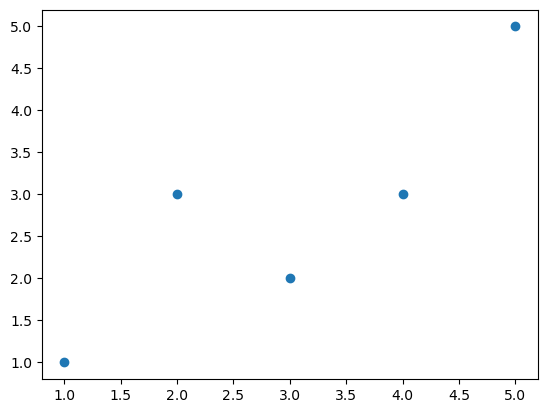

In [4]:
plt.scatter(x,y)
plt.show()

8.0
10.0


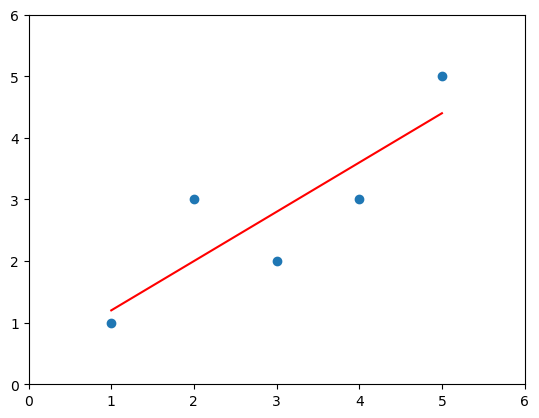

In [6]:
simpleLinearRegression1 = SimpleLinearRegression1()
simpleLinearRegression1.fit(x,y)
y_hat = simpleLinearRegression1.a_ * x + simpleLinearRegression1.b_
plt.scatter(x,y)
plt.plot(x,y_hat,color = 'r')
plt.axis([0,6,0,6])
plt.show()

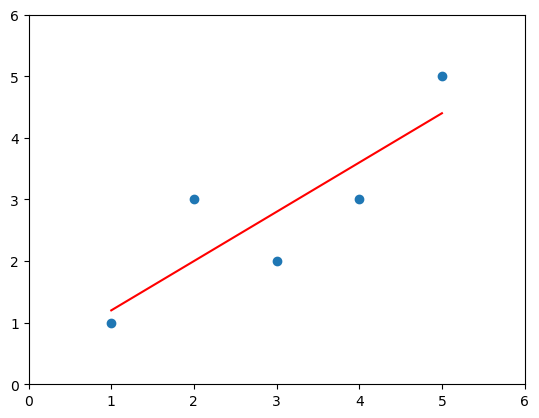

In [9]:
simpleLinearRegression2 = SimpleLinearRegression2()
simpleLinearRegression2.fit(x,y)
y_hat_2 = simpleLinearRegression2.a_ * x + simpleLinearRegression2.b_
plt.scatter(x,y)
plt.plot(x,y_hat_2,color = 'r')
plt.axis([0,6,0,6])
plt.show()